My motivation, in this project was to find create a short analysis of African Americans and Black Latino American criminal activity. The data set used in this case scenario was derrived from criminal activity in the 5 boroughs of NYC.

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
missing_values = ["n/a","na","--","-"]

In [5]:
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date__20231219.csv')

In [16]:
df.shape

(22780, 19)

In [17]:
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77.0,0.0,45-64,F,BLACK,999335.0,186085.0,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515.0,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73.0,0.0,25-44,M,BLACK,1009318.0,178259.0,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62.0,0.0,25-44,M,WHITE,982272.0,158771.0,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32.0,0.0,25-44,M,BLACK,999899.0,238684.0,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71.0,0.0,25-44,M,BLACK,1001437.0,183080.0,40.669175,-73.938042,POINT (-73.938042 40.669175)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22775,267689453,05/03/2023,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110MU,M,M,26.0,0.0,18-24,M,BLACK,996660.0,235153.0,40.812109,-73.955168,POINT (-73.955168 40.812109)
22776,261717584,01/11/2023,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,K,69.0,0.0,25-44,M,BLACK,1012910.0,175663.0,40.648786,-73.896717,POINT (-73.896717 40.648786)
22777,261253888,01/03/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,43.0,0.0,25-44,M,WHITE HISPANIC,1021822.0,245547.0,40.840566,-73.864209,POINT (-73.864209 40.840566)
22778,263439665,02/11/2023,115.0,RECKLESS ENDANGERMENT 2,355.0,OFFENSES AGAINST THE PERSON,PL 1202000,M,B,44.0,0.0,25-44,M,BLACK HISPANIC,1007343.0,245993.0,40.841841,-73.916538,POINT (-73.916538 40.841841)


created a column list to copy and paste from

In [ ]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34016 entries, 0 to 34015
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                34016 non-null  int64  
 1   ARREST_DATE               34016 non-null  object 
 2   PD_CD                     34016 non-null  int64  
 3   PD_DESC                   34015 non-null  object 
 4   KY_CD                     34011 non-null  float64
 5   OFNS_DESC                 34015 non-null  object 
 6   LAW_CODE                  34015 non-null  object 
 7   LAW_CAT_CD                33754 non-null  object 
 8   ARREST_BORO               34015 non-null  object 
 9   ARREST_PRECINCT           34015 non-null  float64
 10  JURISDICTION_CODE         34015 non-null  float64
 11  AGE_GROUP                 34015 non-null  object 
 12  PERP_SEX                  34015 non-null  object 
 13  PERP_RACE                 34015 non-null  object 
 14  X_COOR

In [ ]:
unique_boro = df['ARREST_BORO'].unique()
unique_boro

array(['K', 'M', 'Q', 'B', 'S', nan], dtype=object)

K = Kings County, M = Manhattan, Q = Queens, B = Bronx, S = Staten Island

AMOUNT OF ARRESTS IN EACH BOROUGH

In [30]:
df.groupby(['ARREST_BORO'])['ARREST_DATE'].count().sort_values(ascending = True)

ARREST_BORO
S     944
Q    4850
M    5236
B    5400
K    6349
Name: ARREST_DATE, dtype: int64

In [ ]:
unique_races = df['PERP_RACE'].unique()
unique_races

array(['BLACK', 'WHITE', 'ASIAN / PACIFIC ISLANDER', 'WHITE HISPANIC',
       'BLACK HISPANIC', 'UNKNOWN', 'AMERICAN INDIAN/ALASKAN NATIVE'],
      dtype=object)

COUNT OF CRIMES COMMITTED BY EACH RACE

In [ ]:
crime_by_race = df['PERP_RACE'].value_counts(ascending = True)
crime_by_race

AMERICAN INDIAN/ALASKAN NATIVE       93
UNKNOWN                             512
ASIAN / PACIFIC ISLANDER           1788
BLACK HISPANIC                     3204
WHITE                              3432
WHITE HISPANIC                     8561
BLACK                             16425
Name: PERP_RACE, dtype: int64

FILTERING TO BLACK AND BLACK HISPANIC CRIME IN EACH BOROUGH

In [14]:
race_filter_df = df[df['PERP_RACE'].isin(['BLACK', 'BLACK HISPANIC']) & df['ARREST_BORO'].isin(['K', 'M', 'Q', 'B', 'S'])]

In [31]:
crime_counts = race_filter_df.groupby(['PERP_RACE', 'ARREST_BORO']).size().reset_index(name='COUNT')

In [11]:
print("Count of BLACK and BLACK HISPANIC crimes in each borough:")
print(crime_counts)

Count of BLACK and BLACK HISPANIC crimes in each borough:
        PERP_RACE ARREST_BORO  COUNT
0           BLACK           B   2529
1           BLACK           K   3760
2           BLACK           M   2511
3           BLACK           Q   1892
4           BLACK           S    382
5  BLACK HISPANIC           B    947
6  BLACK HISPANIC           K    301
7  BLACK HISPANIC           M    537
8  BLACK HISPANIC           Q    266
9  BLACK HISPANIC           S     53


CREATING BAR GRAPH TO SHOW COMPARISON BTWN BLACK AND BLACK HISPANIC CRIME

In [18]:
crime_counts_pivot = crime_counts.pivot(index='ARREST_BORO', columns='PERP_RACE', values='COUNT')

<Axes: title={'center': 'BLACK / BLACK HISPANIC CRIMES IN NYC (by borough)'}, xlabel='Boroughs', ylabel='Number of Crimes'>

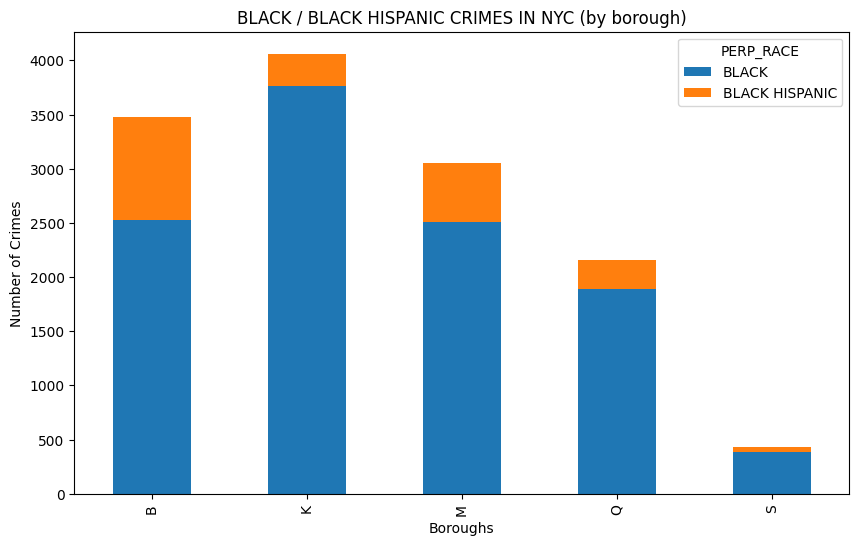

In [27]:
ax = crime_counts_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Boroughs')
ax.set_title('BLACK / BLACK HISPANIC CRIMES IN NYC (by borough)')
ax

In conclusion, I have found that Afro Americans (blacks) commit more than twice the ammount of crime than their Black Latino counterparts in the NYC area. My primary focus was to provide a framework for those who desire to study Black / Black Latino criminal activity within the 5 boroughs. My suggestion, in this case, would be to dive deeper into factors such as population, poverty level and family structure to continue this case study.